# Areas of Crime in our Nation's Capital

Being a resident of our nation’s capital, I was curious to learn more about the city. I was not looking for anything in particular, just curious. I started with viewing the Wikipedia. Learning about the history, architecture, culture, population, among other things. Being that Washington DC is the capital, there is no shortage of unique information. 

I was also curious on how to build an interactive map. Something of a challenge to myself. Then I got the idea to use the city’s demographics (population, income, home value, etc.) and with power of the Folium library, build a choropleth map to visually see the differences. I included crime data as well, specifically violent gun-related crime, and noticed a very distinctive trend. Areas where there are high income, high home value, and high education had almost no violent crime. I had to learn more and find out if there are other demographics that contribute to violent crime.

__Questions__
1.	Building a choropleth map, can we find a “boundary” which separates crime from non-crime?
2.	Can we predict if a particular area (census district) will be high in violent gun-related crimes?

__(note, throughout this notebook, any mention of the word crime specifically means violent gun-related crime)__

Here is how I tackled the problem 
-	Research what contributes to crime
-	Grab demographic data from the US Census 
-	Build a model that can predict if a particular area is susceptible to violent crime

During my research, the following factors kept coming up: education, employment, and income. I was curious though if other factors contribute to crime as well. Navigating the US Census database, I pulled the following information: population, income, home value, marital status, education level, employment status, access to a car, and veteran status. 

After running the data through my model, I found that certain factors are in fact correlated with violent crime, with the two most being education and marital status. Further research is needed to explain why (and beyond the scope of this particular project), however this makes sense as education provides an opportunity for employment (or better employment) which leads to higher income. Marital status is interesting and I can only speculate why. Perhaps with two sources of income, the “need” to commit crime doesn’t exist? Alternatively, it can be more psychological: the potential of being separated by one’s partner? Whatever the cause, further research is needed.

The objective of DC’s city council is to govern the city, provide a safe environment, and help foster a well-connected community. The information I provided can help city council to understand what factors contribute to violent crime. With my findings, I recommend that city council invest in public schools with a goal to push students towards pursuing higher education, and for police officers to patrol areas with the highest amount of violent crime. 

This project is not over. As I mentioned, further research is needed to understand why areas with high education and a higher percentage of married couples decrease violent crime. 

Links to the research are listed at the bottom.


# Building a Choropleth Map

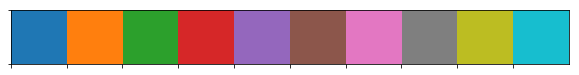

In [1]:
# import libraies
import pandas as pd
import numpy as np
import os
import json
import folium
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import seaborn as sns
current_palette = sns.color_palette()
sns.palplot(current_palette)

First, I need to read the Shapfile provided by the US Census and convert it to a geojson file.

In [2]:
# read and view the US Census shapefile for DC. This provides the coordinates for the DC census boundaries 
file = os.path.join('dc_census_track/', 'cb_2017_11_tract_500k.shp')
shapefile = gpd.read_file(file)
print(type(shapefile))
shapefile.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID   NAME LSAD  \
0      11      001  000400  1400000US11001000400  11001000400      4   CT   
1      11      001  000600  1400000US11001000600  11001000600      6   CT   
2      11      001  002102  1400000US11001002102  11001002102  21.02   CT   
3      11      001  004201  1400000US11001004201  11001004201  42.01   CT   
4      11      001  004902  1400000US11001004902  11001004902  49.02   CT   

     ALAND  AWATER                                           geometry  
0  1542760      69  POLYGON ((-77.07316399999999 38.923051, -77.07...  
1  1442822      71  POLYGON ((-77.07650699999999 38.94221599999999...  
2   726388       0  POLYGON ((-77.019897 38.958733, -77.0134219999...  
3   204529       0  POLYGON ((-77.041656 38.91678, -77.041224 38.9...  
4   263884       0  POLYGON ((-77.02703699999999 38.90564699999999...

AxesSubplot(0.2523,0.125;0.5204x0.755)
AxesSubplot(0.2523,0.125;0.5204x0.755)


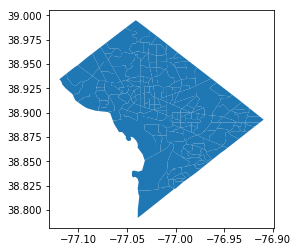

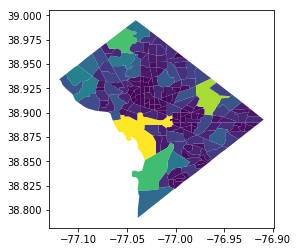

In [3]:
# check if DC with all it's census boundries are displayed 
print(shapefile.plot()) # correctly prints the census boundaries
print(shapefile.plot(column='ALAND')) # testing the choropleth map

Great, it works.

Note .txt is an extension and json is the data format. in order to convert anything to json there has to be some sort of relation like key-value pair, table-column etc.. an unstructured text file can not be directly converted to json format

In [4]:
# convert the GeoDataFrame shapefile to a json format
shapefile_json = shapefile.to_json()
#type(shapefile_json) # prints out a str

parsed = json.loads(shapefile_json)
#print(json.dumps(parsed, indent=4, sort_keys=True)) #this prettyprints the json

# saving the str file to geojson
with open('geo_data.json', 'w') as f:
    json.dump(parsed, f, indent=4, sort_keys=True, )
f.close()

geo_data = json.load(open('geo_data.json'))

In [5]:
print(type(geo_data)) # prints class 'dict'
print(geo_data.keys()) # two keys: 'features' and 'type'
print(geo_data['type'])
print(geo_data['features'][0])

<class 'dict'>
dict_keys(['features', 'type'])
FeatureCollection
{'geometry': {'coordinates': [[[-77.07316399999999, 38.923051], [-77.073188, 38.926182], [-77.073162, 38.928611], [-77.07265, 38.931871], [-77.06639, 38.931467], [-77.066384, 38.927527], [-77.06324, 38.92752], [-77.057718, 38.923213], [-77.056079, 38.923283999999995], [-77.05403799999999, 38.921182], [-77.05695399999999, 38.920257], [-77.05653199999999, 38.919523], [-77.059084, 38.918313], [-77.063824, 38.918445999999996], [-77.06689399999999, 38.918656], [-77.067388, 38.917759], [-77.068752, 38.916965999999995], [-77.06938199999999, 38.917725999999995], [-77.07147599999999, 38.920187999999996], [-77.072907, 38.922543], [-77.073195, 38.922543999999995], [-77.07316399999999, 38.923051]]], 'type': 'Polygon'}, 'id': '0', 'properties': {'AFFGEOID': '1400000US11001000400', 'ALAND': 1542760, 'AWATER': 69, 'COUNTYFP': '001', 'GEOID': '11001000400', 'LSAD': 'CT', 'NAME': '4', 'STATEFP': '11', 'TRACTCE': '000400'}, 'type': 'Featur

__In order for the folium choropleth map to work, both the geo_json file (which holds the boundaries) and the data_file (which holds the data values) need to match for a particular column. In other words, both columns need to be identical in terms of data type and value.__

In [6]:
# replace all 'id' values to 'geoid' values
for feature in geo_data['features']:
    #geoid.append(feature['properties']['GEOID'])
    #print(feature['id'])
    feature['id'] = feature['properties']['GEOID']
    #print(feature['geometry']['coordinates'])

In [7]:
# confirm if the 'id' values have been replaced
print(geo_data['features'][1])

{'geometry': {'coordinates': [[[-77.07650699999999, 38.942215999999995], [-77.06887499999999, 38.942209999999996], [-77.067852, 38.940875999999996], [-77.06513199999999, 38.940475], [-77.06165399999999, 38.940971999999995], [-77.061517, 38.940735], [-77.059243, 38.936824], [-77.05677, 38.93257], [-77.059874, 38.930394], [-77.063254, 38.930509], [-77.064679, 38.931069], [-77.06639, 38.931467], [-77.07265, 38.931871], [-77.07241499999999, 38.933484], [-77.07250499999999, 38.934636], [-77.075037, 38.939544999999995], [-77.07650699999999, 38.942215999999995]]], 'type': 'Polygon'}, 'id': '11001000600', 'properties': {'AFFGEOID': '1400000US11001000600', 'ALAND': 1442822, 'AWATER': 71, 'COUNTYFP': '001', 'GEOID': '11001000600', 'LSAD': 'CT', 'NAME': '6', 'STATEFP': '11', 'TRACTCE': '000600'}, 'type': 'Feature'}


Great. I was able to change the `feature.id` values to the `GEOID` values.

## Bringing in the data

The following data was pulled from the US Census (a great resource). I used Excel to combine all the data into one file. The `GEOID2` column is the unique number assigned to an individual census district. This is the column I will match with my geojson file.

In [8]:
dc_2017 = pd.read_csv('dc_data_2017.csv')
dc_2017.head()

OBJECTID  TRACT                   GEO       GEOID2  \
0        11    100  1400000US11001000100  11001000100   
1        12    201  1400000US11001000201  11001000201   
2        13    202  1400000US11001000202  11001000202   
3        14    300  1400000US11001000300  11001000300   
4        15    400  1400000US11001000400  11001000400   

                                   GEO_display_label  Population    Income  \
0  Census Tract 1, District of Columbia, District...        5170  168477.0   
1  Census Tract 2.01, District of Columbia, Distr...        3682       NaN   
2  Census Tract 2.02, District of Columbia, Distr...        4473  162981.0   
3  Census Tract 3, District of Columbia, District...        6374  133008.0   
4  Census Tract 4, District of Columbia, District...        1489  143229.0   

   Home_value  No_car_percent  Bachelor_or_higher  Employment_percent  \
0   1048200.0           0.181              0.9129               0.754   
1         NaN             NaN              1.0000               0.393   
2   1195300.0           0.168              0.9264               0.641   
3    893000.0           0.160              0.8909               0.794   
4   1223700.0           0.120              0.7906               0.617   

   Marital_percent  Veterans_percent  
0            0.489             0.082  
1            0.010               NaN  
2            0.305             0.035  
3            0.313             0.021  
4            0.497             0.044

In [10]:
dc_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
OBJECTID              179 non-null int64
TRACT                 179 non-null int64
GEO                   179 non-null object
GEOID2                179 non-null int64
GEO_display_label     179 non-null object
Population            179 non-null int64
Income                177 non-null float64
Home_value            172 non-null float64
No_car_percent        175 non-null float64
Bachelor_or_higher    178 non-null float64
Employment_percent    178 non-null float64
Marital_percent       178 non-null float64
Veterans_percent      177 non-null float64
dtypes: float64(7), int64(4), object(2)
memory usage: 18.3+ KB


I need to rename the 'GEOID2' column to 'GEOID' and change the data type to a str so it can match with the geo_json file

In [9]:
dc_2017.rename(columns={'GEO': 'GEOMAIN', 'GEOID2': 'GEOID'}, inplace=True)
dc_2017['GEOID'] = dc_2017['GEOID'].astype(str)

#dc_2010['Home_value'] = dc_2010['Home_value'].str.replace(',', '')
#dc_2010['Home_value'] = dc_2010['Home_value'].astype(float)

In [10]:
dc_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
OBJECTID              179 non-null int64
TRACT                 179 non-null int64
GEOMAIN               179 non-null object
GEOID                 179 non-null object
GEO_display_label     179 non-null object
Population            179 non-null int64
Income                177 non-null float64
Home_value            172 non-null float64
No_car_percent        175 non-null float64
Bachelor_or_higher    178 non-null float64
Employment_percent    178 non-null float64
Marital_percent       178 non-null float64
Veterans_percent      177 non-null float64
dtypes: float64(7), int64(3), object(3)
memory usage: 18.3+ KB


Change is successful.

## The actual building of the Choropleth map

First, I'll build a map with just the census boundaries to verify that my geojson file is formatted correctly.

In [17]:
# create the folium object
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

folium.Choropleth(geo_data=geo_data).add_to(m)

m.save(os.path.join('maps', 'dc_map_2017_1.html'))

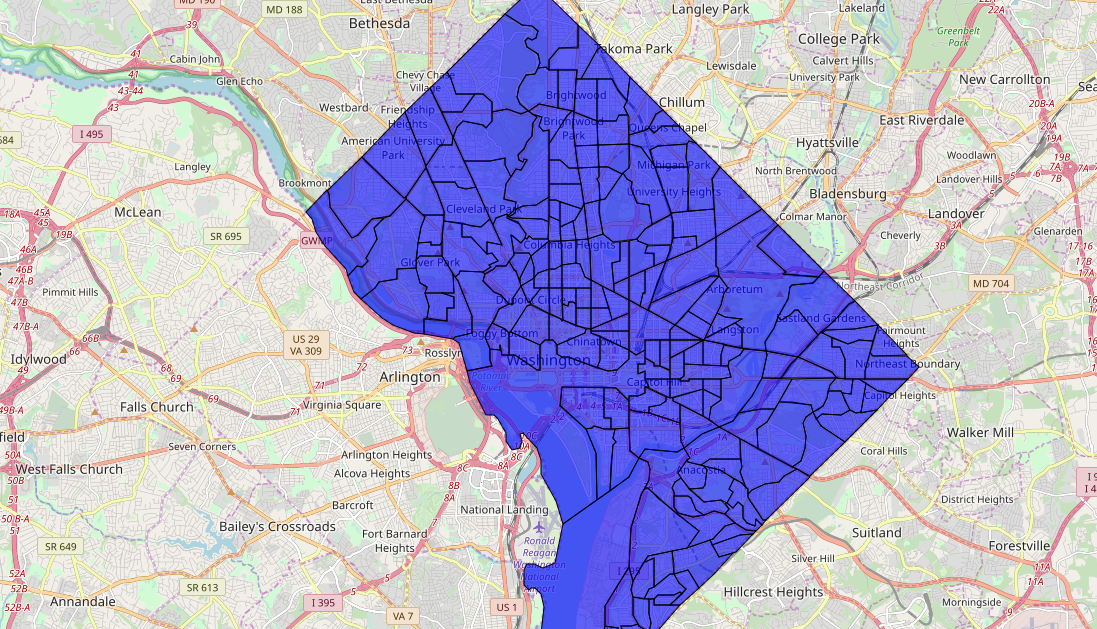

Great, it works.

Now to add the data.

In [28]:
# create the folium object
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# population
folium.Choropleth(
    geo_data=geo_data,
    name='Population',
    data=dc_2017,
    columns=['GEOID', 'Population'],
    key_on='feature.id', # the information from both files need to match EXACTLY (value and type (str or int)) 
    fill_color='PuBu',
    legend_name='Population', # cannot remove the legend
    overlay=True,
    show=False
).add_to(m)

# income
folium.Choropleth(
    geo_data=geo_data,
    name='Income',
    data=dc_2017,
    columns=['GEOID', 'Income'],
    key_on='feature.id',
    fill_color='PuBu',
    legend_name='Income',
    overlay=True,
    show=False
).add_to(m)

# home value
folium.Choropleth(
    geo_data=geo_data,
    name='Home Value',
    data=dc_2017,
    columns=['GEOID', 'Home_value'],
    key_on='feature.id',
    fill_color='PuBu',
    legend_name='Home Value',
    overlay=True,
    show=False
).add_to(m)

# education
folium.Choropleth(
    geo_data=geo_data,
    name='Bachelors or Higher (%)',
    data=dc_2017,
    columns=['GEOID', 'Bachelor_or_higher'],
    key_on='feature.id',
    fill_color='PuBu',
    legend_name='Percent of Bachelor or Higher',
    overlayer=True,
    show=False
).add_to(m)

# employment
folium.Choropleth(
    geo_data=geo_data,
    name='Employment (%)',
    data=dc_2017,
    columns=['GEOID', 'Employment_percent'],
    key_on='feature.id',
    fill_color='PuBu',
    legend_name='Percent of Employment',
    overlay=True,
    show=False
).add_to(m)

# marital status
folium.Choropleth(
    geo_data=geo_data,
    name='Married (%)',
    data=dc_2017,
    columns=['GEOID', 'Marital_percent'],
    key_on='feature.id',
    fill_color='PuBu',
    legend_name='Percent of Married Household',
    overlay=True,
    show=False
).add_to(m)

# veteran status
folium.Choropleth(
    geo_data=geo_data,
    name='Veteran (%)',
    data=dc_2017,
    columns=['GEOID', 'Veterans_percent'],
    key_on='feature.id',
    fill_color='PuBu',
    legend_name='Percent of Veterans',
    overlay=True,
    show=False
).add_to(m)

#folium.LayerControl(collapsed=False).add_to(m)


m.save(os.path.join('maps', 'dc_map_2017_2.html'))

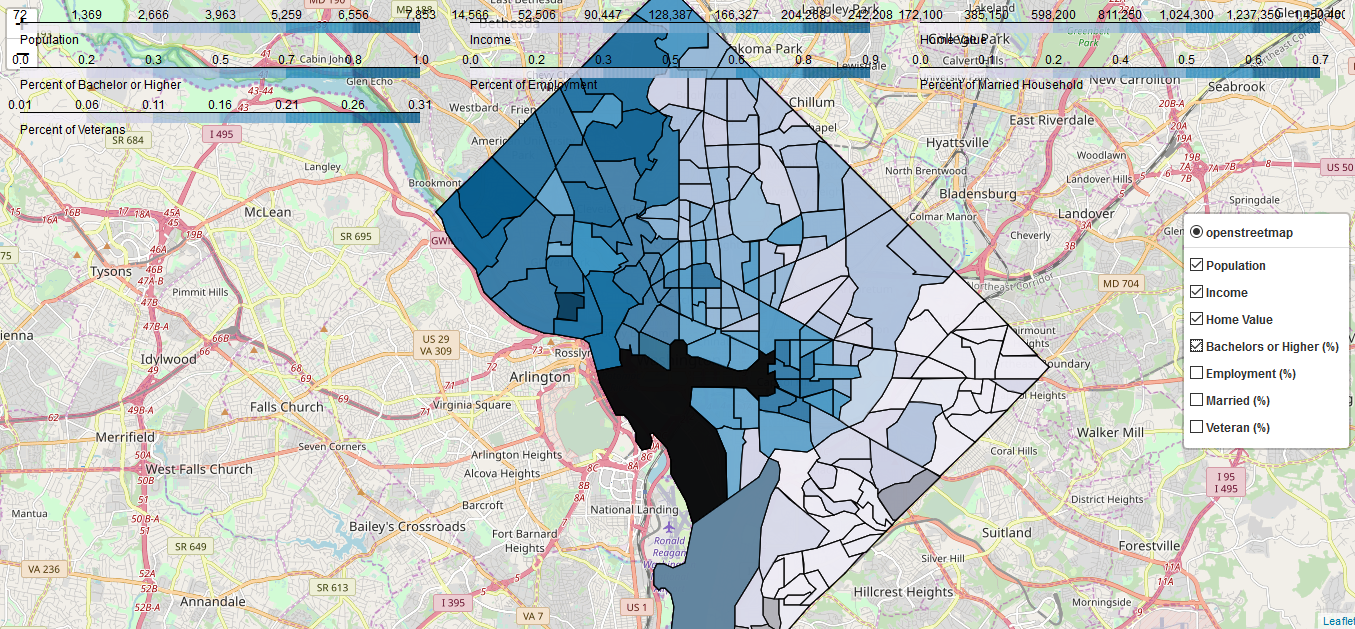

Great! The choropleth maps works with all the data shadded. Unfortunately, the legend seems to be in the way and it cannot (or I just can't figure it out) be removed.

## Adding Markers for Historic Landmarks

What's a map of DC without all the historic landmarks which it's famous for. Using Yelp's API, I saved landmarks with their coordinates. Each landmark will be a Folium marker.

In [24]:
# create an icon for each landmark
landmark = pd.read_csv('landmarks.csv')
landmark.drop(columns=['Unnamed: 0'], inplace=True)
landmark.drop(landmark.index[[0,1,2]], inplace=True)
landmark.head()

Name        Lat        Lon
3        Library of Congress  38.888733 -77.004502
4           Lincoln Memorial  38.889346 -77.050200
5      United States Capitol  38.891450 -77.012170
6        Washington Monument  38.889576 -77.035258
7  Thomas Jefferson Memorial  38.881423 -77.036487

In [29]:
# using market cluster to make the markers easier to read
# note, you have to pass a list to `locations=` cannot do `locations=[lat,lon]`
from folium.plugins import MarkerCluster

#m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

names = landmark['Name']
lats = landmark['Lat']
lons = landmark['Lon']

marker_cluster = MarkerCluster(name='National Landmarks', show=False).add_to(m)

for name, lat, lon in zip(names, lats, lons):
    folium.Marker(location=[lat, lon],
                  popup=name,
                  icon=folium.Icon(color='green')).add_to(marker_cluster) # each marker is added to `marker_cluster` object
    marker_cluster.add_to(m) # each marker_cluster is added to the map

#folium.LayerControl(collapsed=False).add_to(m)

m.save(os.path.join('maps', 'dc_map_2017_3.html'))

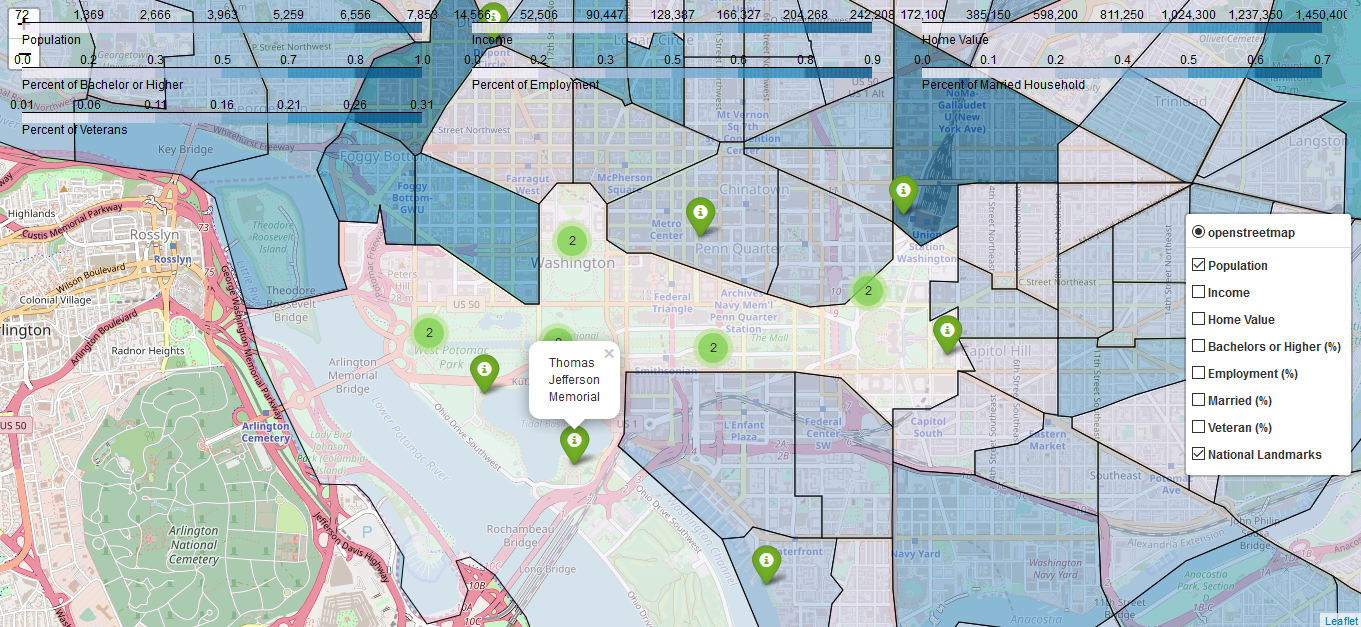

## Adding a Heatmap for Violent Crime 

Now I'll add the crime data as a heatmap.

In [26]:
crime = pd.read_csv('crime.csv')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 3 columns):
offense_text    1584 non-null object
LONGITUDE       1584 non-null float64
LATITUDE        1584 non-null float64
dtypes: float64(2), object(1)
memory usage: 37.2+ KB


In [27]:
crime_loc = list(zip(crime['LATITUDE'], crime['LONGITUDE']))
crime_loc[0]

(38.94133373, -77.02538826)

In [30]:
# note, need to give it a list of lat, lon, i.e a list of lists. also no NaN
# ex: [[lat, lon],[lat, lon],[lat, lon],[lat, lon],[lat, lon]]
# must also be a type float

from folium import plugins
from folium.plugins import HeatMap

# List comprehension to make out list of lists
crime_loc = list(zip(crime['LATITUDE'], crime['LONGITUDE']))
# print(crime_loc[0])

#m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Plot it on the map
HeatMap(data=crime_loc,
        name='Violent Crime',
        control=True,
        show=False).add_to(m)

folium.LayerControl(collapsed=False).add_to(m) # the LayerControl must be added to the last layer

m.save(os.path.join('maps', 'dc_map_2017_4.html'))

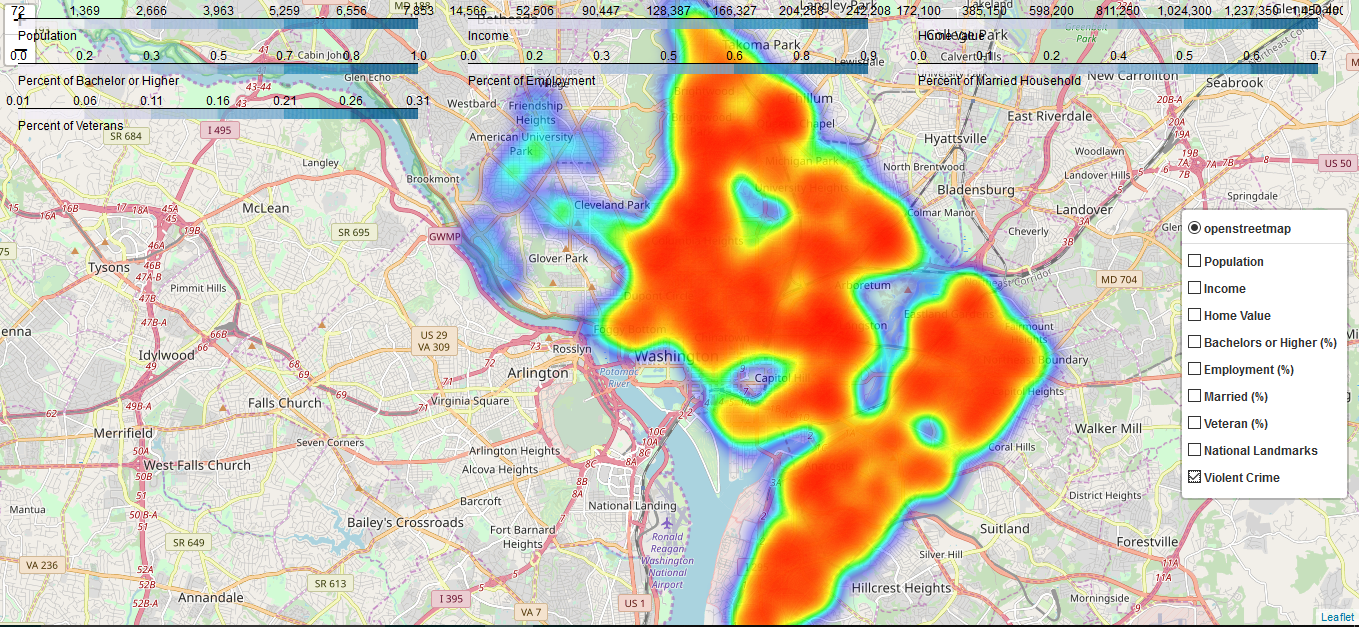

The heatmap works and interesting enough, there seems to be an area in DC where violent crime is absent. Let's explore more of the crime data.

# Exploratory Data Analysis

DC Police have created an interactive web app called [DC Crime Card](https://dcatlas.dcgis.dc.gov/crimecards/), which provides the capability to search for specific kinds of crimes and visual them as hotspots. Not all crime is related. There is a significant difference between jaywalking and littering to rape and murder. For this analysis, I narrowed my search for all violent gun-related crimes that occurred in 2017. A total of 1,574 incidents were reported.

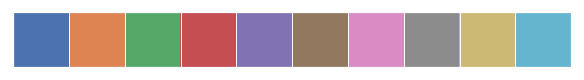

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [32]:
# joining the file
file = os.path.join('data/', 'crime', 'crime_full.csv')
crime_df = pd.read_csv(file)

# viewing and understanding the data types for each column
crime_df.head()
#crime_df.info()

NEIGHBORHOOD_CLUSTER  CENSUS_TRACT offensegroup  LONGITUDE  \
0           cluster 22       11100.0      violent -76.974191   
1           cluster 31        7809.0      violent -76.927129   
2           cluster 22        9102.0      violent -76.984881   
3           cluster 17        1803.0      violent -77.036383   
4           cluster 21        3400.0      violent -77.015013   

                  END_DATE                offense-text     SHIFT  YBLOCK  \
0  2017-11-13T11:35:34.000                     robbery       day  139566   
1  2017-11-17T22:57:16.000  assault w/dangerous weapon   evening  136994   
2  2017-11-17T22:45:01.000  assault w/dangerous weapon  midnight  139563   
3  2017-09-21T01:45:23.000                     robbery       day  144379   
4  2017-10-25T00:27:59.000                     robbery  midnight  138541   

   DISTRICT  WARD    ...                                          BLOCK  \
0         5     5    ...            2600 - 2699 block of 22nd street ne   
1         6     7    ...              800 - 899 block of 51st street ne   
2         5     5    ...         1400 - 1424 block of montana avenue ne   
3         4     4    ...           6314  - 6399 block of 16th street nw   
4         3     1    ...      200 - 299 block of rhode island avenue nw   

                START_DATE       CCN                     OFFENSE  \
0  2017-11-13T10:35:32.000  17196635                     robbery   
1  2017-11-17T20:08:53.000  17199382  assault w/dangerous weapon   
2  2017-11-17T22:41:13.000  17199489  assault w/dangerous weapon   
3  2017-09-21T01:40:07.000  17163823                     robbery   
4  2017-10-25T00:25:15.000  17185001                     robbery   

   OCTO_RECORD_ID  ANC                REPORT_DAT METHOD  \
0     17196635-01   5C  2017-11-13T16:35:36.000Z    gun   
1     17199382-01   7C  2017-11-18T03:57:39.000Z    gun   
2     17199489-01   5C  2017-11-18T07:01:11.000Z    gun   
3     17163823-01   4A  2017-09-21T13:58:32.000Z    gun   
4     17185001-01   1B  2017-10-25T08:00:34.000Z    gun   

                                 location   LATITUDE  
0  38.923973417948297,-76.974193510301745  38.923966  
1  38.900784092272893,-76.927131753204847  38.900776  
2  38.923948264522402,-76.984883745500071  38.923940  
3  38.967327474290151,-77.036385027160023  38.967320  
4  38.914741765118478,-77.015015097113633  38.914734  

[5 rows x 29 columns]

Let's convert the start date to datetime format so we can get a sense of the crime committed per month and week. The `crime_df['START_DATE']` column is formatted as Year, month, date, time. However, there is a `T` between date and time. I'll replace the `T` with a space and then format it correctly. I'll also remove the microseconds.

`crime_df['CENSUS_TRACT']` will be converted to an int type and padded with the correct GEO code so it can be paired with the GEOJSON file
- if 3 digits: add 11001000
- if 4 digits: add 1100100
- if 5 digits: add 110010

In [33]:
crime_df['START_DATE'] = crime_df['START_DATE'].str.replace('T', ' ').str.replace('.000', '')
crime_df['START_DATE'] = pd.to_datetime(crime_df['START_DATE'], format='%Y-%m-%d %H:%M:%S')

crime_df['CENSUS_TRACT'] = crime_df['CENSUS_TRACT'].fillna(0)
crime_df['CENSUS_TRACT'] = crime_df['CENSUS_TRACT'].astype(int) # converted to int so remove he .0 decimal 

crime_df['CENSUS_TRACT'] = crime_df['CENSUS_TRACT'].astype(str) # converted to str so i can pad the digits needed
#crime_df['CENSUS_TRACT'] = crime_df['CENSUS_TRACT'].str.rjust(11, '110010')
#len(crime_df['CENSUS_TRACT'][0])

new_list =[]
for i in crime_df['CENSUS_TRACT']:
    if len(i) == 3:
        i='11001000'+i
    if len(i) == 4:
        i='1100100'+i
    if len(i) == 5:
        i='110010'+i
    new_list.append(i)

#print(new_list)
crime_df['CENSUS_TRACT'] = new_list
#crime_df['CENSUS_TRACT'] = crime_df['CENSUS_TRACT'].astype(str)

In [36]:
# verify
# crime_df.info()

I'll create a new `Month` and `Weekday` column to analyze when crimes occur.

In [34]:
import calendar

crime_df['Month'] = (crime_df['START_DATE'].dt.month).apply(lambda x: calendar.month_abbr[x])
crime_df['Month'] = pd.Categorical(crime_df['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
                                                                  'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

crime_df['Weekday'] = crime_df['START_DATE'].dt.weekday_name
crime_df['Weekday'] = pd.Categorical(crime_df['Weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                                                      'Friday', 'Saturday', 'Sunday'], ordered=True)

Now that I have `Month` and `Weekday` columns, I can start the exploring.

## Let's explore the data

### Number of crimes reported each month

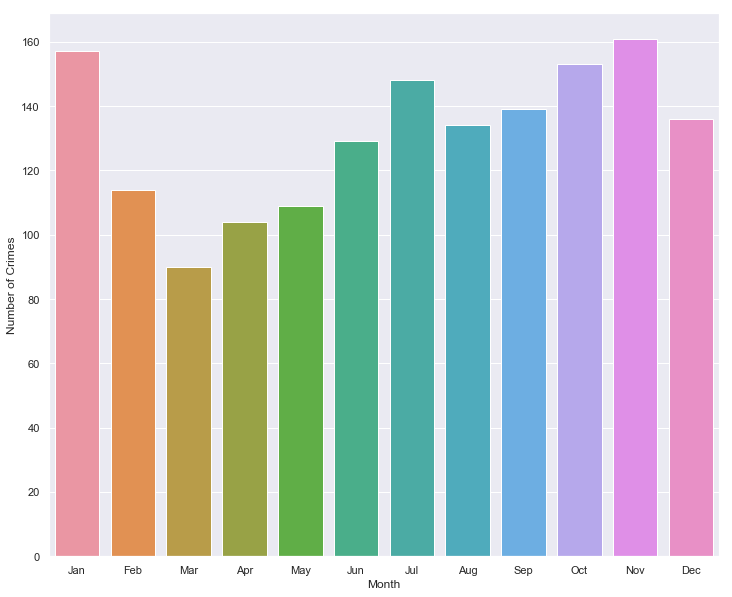

In [35]:
sns.countplot(x='Month', data=crime_df)
plt.ylabel('Number of Crimes')
plt.show()

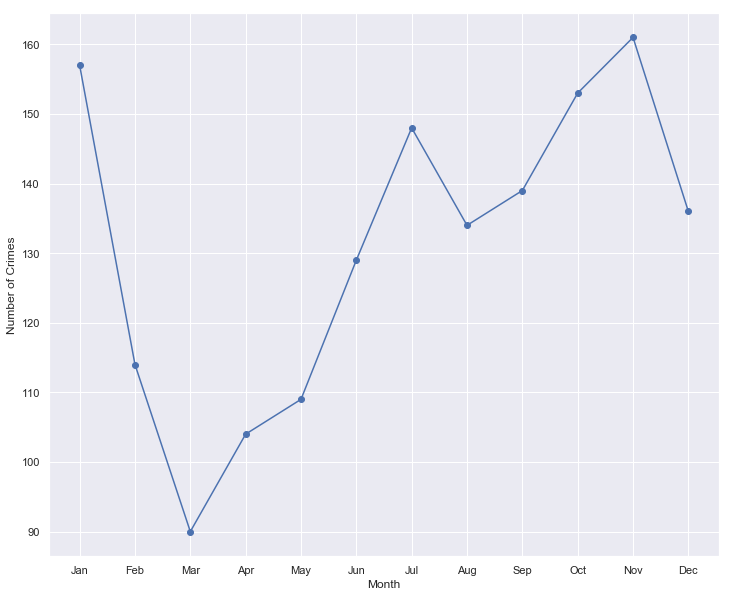

In [36]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
crime_df.groupby('Month')['CENSUS_TRACT'].count().plot(marker='o')
plt.xticks(np.arange(12), month)
plt.ylabel('Number of Crimes')
plt.show()

Crime seems to decrease during the winter months with the lowest point in March. Around May, it starts to increase with a peack in November.

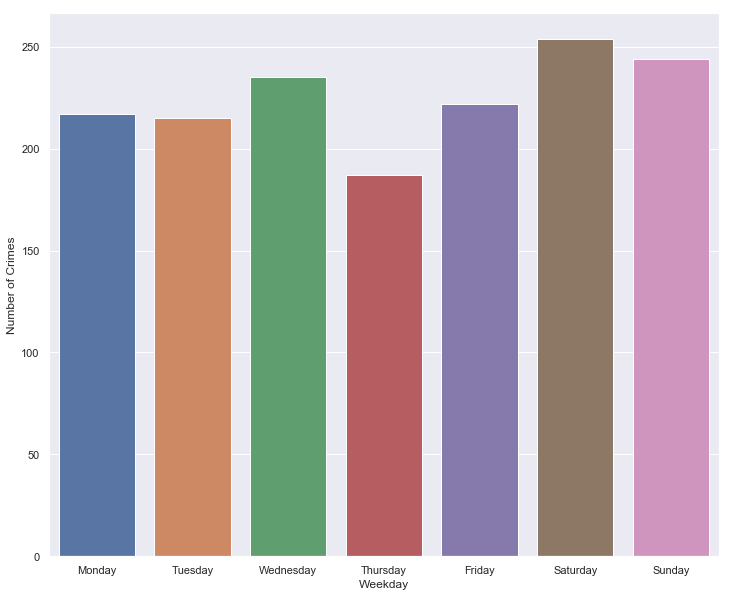

In [37]:
sns.countplot(x='Weekday', data=crime_df)
plt.ylabel('Number of Crimes')
plt.show()

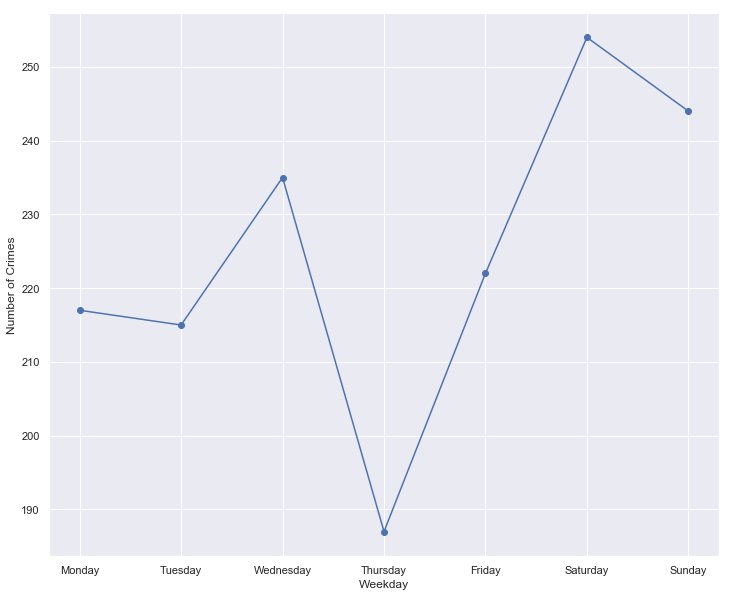

In [38]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_df.groupby('Weekday')['CENSUS_TRACT'].count().plot(marker='o')
plt.xticks(np.arange(7), weekday)
plt.ylabel('Number of Crimes')
plt.show()

Thursday's see the lowest crime incidents while the weekend (with a peak on Saturday) see the highest.

### Time of day violent crimes occur

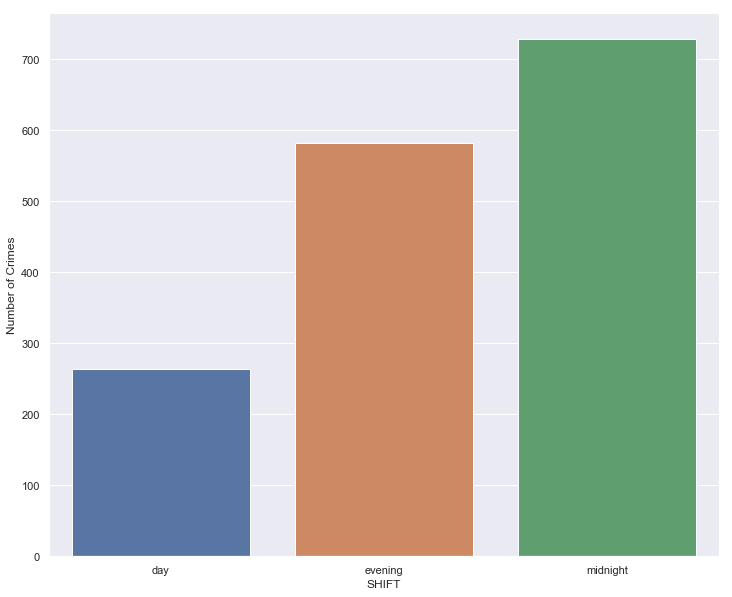

In [39]:
sns.countplot(x='SHIFT', data=crime_df)
plt.ylabel('Number of Crimes')
plt.show()

Violent crimes tend to occur in the evening to midnight time (passed 5pm)

### Now I'll analyze where violent crimes occur

In [40]:
#crime_df['CENSUS_TRACT'].value_counts()
crime_df['CENSUS_TRACT'].nunique()

166

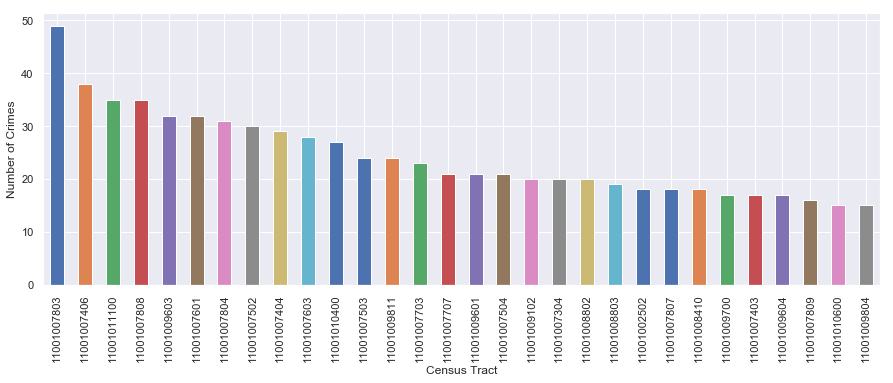

In [41]:
location = crime_df['CENSUS_TRACT'].value_counts()
#type(location)

#location = crime_df.groupby('CENSUS_TRACT').count().sort_values(ascending=False)
location = location[:30] # only want the top 25
#location

location.plot(kind='bar', figsize=(15,5))
plt.xlabel('Census Tract')
plt.ylabel('Number of Crimes')
plt.show()

The census tracts provide a granular area of DC (there over 170 tracts). This is great when trying to narrow pockets of crime. However, the DC government divides DC into 8 separate areas called Wards. Let’s analyze crime based on Wards. 

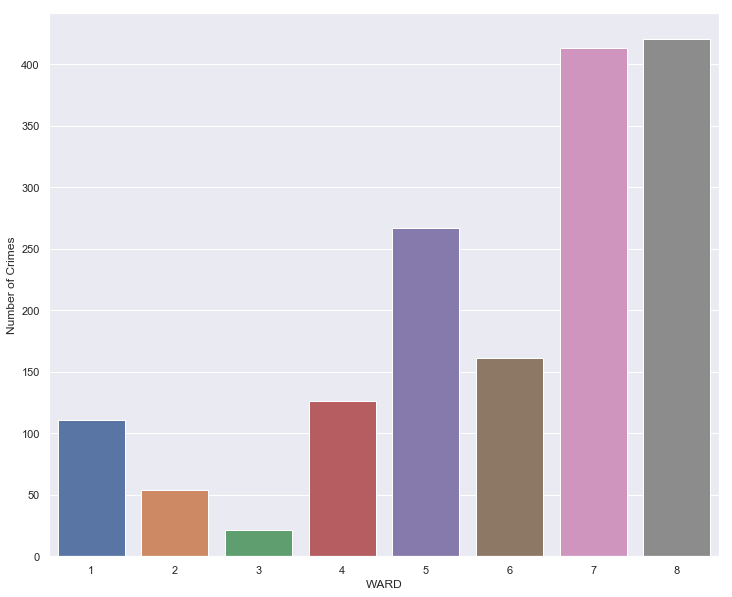

In [42]:
sns.countplot(x='WARD', data=crime_df)
plt.ylabel('Number of Crimes')
plt.show()

Most of the violent crimes are committed in DC are in Wards 7 and 8.

### Analyzing the shift of day for each Ward

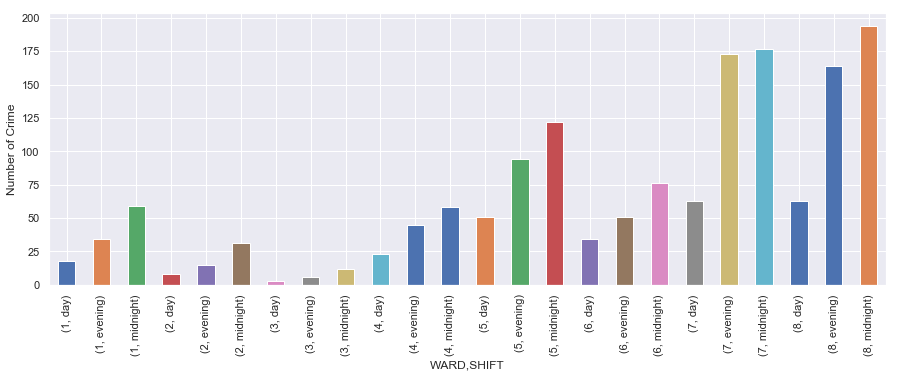

In [43]:
crime_df.groupby(['WARD', 'SHIFT'])['CENSUS_TRACT'].count().plot(kind='bar', figsize=(15,5))
plt.ylabel('Number of Crime')
plt.show()

Even though most violent crimes occurs in Ward 7 and 8, most of the crimes occur during the evening and midnight.

The goal is to try to build a model that can predict if a violent crime will occur based on census tract characteristics. I will count the number of crimes occurred for each census and merge it with the dc_data_2017.csv file.

In [44]:
location = crime_df['CENSUS_TRACT'].value_counts()
#crime_df['Count'] = location
type(location)
#location

pandas.core.series.Series

In [45]:
temp = pd.DataFrame()
temp['Crime_count'] = location
#temp['GEOID2'] = temp.index
temp.reset_index(inplace=True)
temp.rename(columns={'index': 'GEOID2'}, inplace=True)
temp['GEOID2'] = temp['GEOID2'].astype('int64')
#temp.info()
temp.head()

GEOID2  Crime_count
0  11001007803           49
1  11001007406           38
2  11001011100           35
3  11001007808           35
4  11001009603           32

In [46]:
# reading the DC census tract dataframe 
dc_df = pd.read_csv('dc_data_2017.csv')
dc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
OBJECTID              179 non-null int64
TRACT                 179 non-null int64
GEO                   179 non-null object
GEOID2                179 non-null int64
GEO_display_label     179 non-null object
Population            179 non-null int64
Income                177 non-null float64
Home_value            172 non-null float64
No_car_percent        175 non-null float64
Bachelor_or_higher    178 non-null float64
Employment_percent    178 non-null float64
Marital_percent       178 non-null float64
Veterans_percent      177 non-null float64
dtypes: float64(7), int64(4), object(2)
memory usage: 18.3+ KB


In [47]:
merge_df = dc_df.merge(temp, on='GEOID2', how='left')
merge_df.head()

OBJECTID  TRACT                   GEO       GEOID2  \
0        11    100  1400000US11001000100  11001000100   
1        12    201  1400000US11001000201  11001000201   
2        13    202  1400000US11001000202  11001000202   
3        14    300  1400000US11001000300  11001000300   
4        15    400  1400000US11001000400  11001000400   

                                   GEO_display_label  Population    Income  \
0  Census Tract 1, District of Columbia, District...        5170  168477.0   
1  Census Tract 2.01, District of Columbia, Distr...        3682       NaN   
2  Census Tract 2.02, District of Columbia, Distr...        4473  162981.0   
3  Census Tract 3, District of Columbia, District...        6374  133008.0   
4  Census Tract 4, District of Columbia, District...        1489  143229.0   

   Home_value  No_car_percent  Bachelor_or_higher  Employment_percent  \
0   1048200.0           0.181              0.9129               0.754   
1         NaN             NaN              1.0000               0.393   
2   1195300.0           0.168              0.9264               0.641   
3    893000.0           0.160              0.8909               0.794   
4   1223700.0           0.120              0.7906               0.617   

   Marital_percent  Veterans_percent  Crime_count  
0            0.489             0.082          1.0  
1            0.010               NaN          NaN  
2            0.305             0.035          4.0  
3            0.313             0.021          2.0  
4            0.497             0.044          NaN

In [48]:
# save the new merged dataframe (just in case) and so it can be modeled
merge_df.to_csv('dc_data_to_model.csv')

# Building a Machine Learning Model 

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
dc_data_df = pd.read_csv('dc_data_to_model.csv')
dc_data_df.drop('Unnamed: 0', axis=1, inplace=True)
dc_data_df.head()
#dc_data_df.info()

OBJECTID  TRACT                   GEO       GEOID2  \
0        11    100  1400000US11001000100  11001000100   
1        12    201  1400000US11001000201  11001000201   
2        13    202  1400000US11001000202  11001000202   
3        14    300  1400000US11001000300  11001000300   
4        15    400  1400000US11001000400  11001000400   

                                   GEO_display_label  Population    Income  \
0  Census Tract 1, District of Columbia, District...        5170  168477.0   
1  Census Tract 2.01, District of Columbia, Distr...        3682       NaN   
2  Census Tract 2.02, District of Columbia, Distr...        4473  162981.0   
3  Census Tract 3, District of Columbia, District...        6374  133008.0   
4  Census Tract 4, District of Columbia, District...        1489  143229.0   

   Home_value  No_car_percent  Bachelor_or_higher  Employment_percent  \
0   1048200.0           0.181              0.9129               0.754   
1         NaN             NaN              1.0000               0.393   
2   1195300.0           0.168              0.9264               0.641   
3    893000.0           0.160              0.8909               0.794   
4   1223700.0           0.120              0.7906               0.617   

   Marital_percent  Veterans_percent  Crime_count  
0            0.489             0.082          1.0  
1            0.010               NaN          NaN  
2            0.305             0.035          4.0  
3            0.313             0.021          2.0  
4            0.497             0.044          NaN

### Preparing the target and features for machine learning

In [51]:
dc_data_df.info()
dc_data_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 14 columns):
OBJECTID              179 non-null int64
TRACT                 179 non-null int64
GEO                   179 non-null object
GEOID2                179 non-null int64
GEO_display_label     179 non-null object
Population            179 non-null int64
Income                177 non-null float64
Home_value            172 non-null float64
No_car_percent        175 non-null float64
Bachelor_or_higher    178 non-null float64
Employment_percent    178 non-null float64
Marital_percent       178 non-null float64
Veterans_percent      177 non-null float64
Crime_count           165 non-null float64
dtypes: float64(8), int64(4), object(2)
memory usage: 19.7+ KB


OBJECTID               0
TRACT                  0
GEO                    0
GEOID2                 0
GEO_display_label      0
Population             0
Income                 2
Home_value             7
No_car_percent         4
Bachelor_or_higher     1
Employment_percent     1
Marital_percent        1
Veterans_percent       2
Crime_count           14
dtype: int64

Not much NaN. Will replace them with 0

In [52]:
dc_data_df = dc_data_df.fillna(0)
dc_data_df.isna().sum()

OBJECTID              0
TRACT                 0
GEO                   0
GEOID2                0
GEO_display_label     0
Population            0
Income                0
Home_value            0
No_car_percent        0
Bachelor_or_higher    0
Employment_percent    0
Marital_percent       0
Veterans_percent      0
Crime_count           0
dtype: int64

In [53]:
dc_data_df['Crime_count'].describe()

count    179.000000
mean       8.720670
std        8.705556
min        0.000000
25%        2.500000
50%        6.000000
75%       12.000000
max       49.000000
Name: Crime_count, dtype: float64

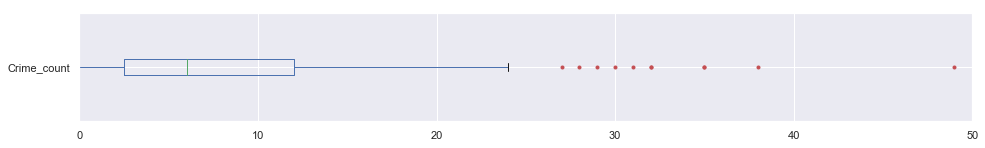

In [54]:
red_box = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
dc_data_df['Crime_count'].plot(kind='box', xlim=(0, 50), vert=False, flierprops=red_box, figsize=(16,2));

The target is crime. However, instead of just the count, it would be better to create a new column that will split the crime_count into high or not. Based on the graph above, 75% of violent crimes have a count of up to 12. If crime count is 12 or greater, I will consider it as a high crime count. Otherwise, the area would be considered not a high violent crime area.

In [59]:
dc_data_df['High_crime'] = dc_data_df['Crime_count'].apply(lambda x: 1 if x >= 12 else 0)
dc_data_df.tail()

index  OBJECTID  TRACT                   GEO       GEOID2  \
174    174       153  10700  1400000US11001010700  11001010700   
175    175       154  10800  1400000US11001010800  11001010800   
176    176       155  10900  1400000US11001010900  11001010900   
177    177       156  11000  1400000US11001011000  11001011000   
178    178       157  11100  1400000US11001011100  11001011100   

                                     GEO_display_label  Population   Income  \
174  Census Tract 107, District of Columbia, Distri...        1711  73750.0   
175  Census Tract 108, District of Columbia, Distri...        6451  36058.0   
176  Census Tract 109, District of Columbia, Distri...        4054  31094.0   
177  Census Tract 110, District of Columbia, Distri...        3720  75529.0   
178  Census Tract 111, District of Columbia, Distri...        5548  75781.0   

     Home_value  No_car_percent  Bachelor_or_higher  Employment_percent  \
174    418400.0           0.581              0.8969               0.757   
175         0.0           0.882              0.8321               0.426   
176         0.0           0.387              0.1540               0.558   
177    344900.0           0.286              0.8209               0.721   
178    428700.0           0.061              0.3972               0.572   

     Marital_percent  Veterans_percent  Crime_count  High_crime  
174            0.130             0.012         11.0           0  
175            0.026             0.012          1.0           0  
176            0.133             0.042         15.0           1  
177            0.289             0.109          3.0           0  
178            0.272             0.062         35.0           1

Only two columns are objects and neither are relevant for my model, so I will just ignore them as appose to changing them to a category or one-hot-encoding.

In [60]:
dc_data_df = dc_data_df.reset_index() # had to reset the index for my models to work

# features or X
features = dc_data_df[['Population', 'Income', 'Home_value', 'No_car_percent', 'Bachelor_or_higher', 'Employment_percent', 
                       'Marital_percent', 'Veterans_percent']]

# target or y
target = dc_data_df[['High_crime']]

### Machine Learning

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')

In [61]:
# split our data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### Support Vector Machine: 81%

In [69]:
# Create the pipeline for SVM
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('svm', svm.SVC(random_state=123))]);

# Create the grid parameter
grid_svm = [{'svm__kernel': ['poly', 'sigmoid'],
         'svm__C': [0.01, 1, 100],
         'svm__degree': [2,3,4,5],
         'svm__gamma': [0.001, 0.01]}];

# Create the grid, with "pipe" as the estimator
gridsearch_svm = GridSearchCV(estimator=pipe_svm,
                  param_grid=grid_svm,
                  scoring='accuracy',
                  cv=3);

# Fit using grid search
gridsearch_svm.fit(X_train, y_train);
best_parameters = gridsearch_svm.best_params_
best_score = gridsearch_svm.best_score_
print(best_parameters)
print(best_score)

{'svm__C': 100, 'svm__degree': 2, 'svm__gamma': 0.001, 'svm__kernel': 'sigmoid'}
0.8111888111888111


### Random Forest: 83%

In [70]:
# Create the pipeline for Random Forest
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=123))]);

# Create the grid parameter
grid_rf = [{'clf__n_estimators': [100, 120],
            'clf__criterion': ['entropy', 'gini'], 
            'clf__max_depth': [5, 8, 10],
            'clf__min_samples_leaf':[0.05, 0.1, 0.2],
            'clf__min_samples_split':[2, 3, 10]}];

# Create the grid, with "pipe" as the estimator
gridsearch_rf = GridSearchCV(estimator=pipe_rf,
                  param_grid=grid_rf,
                  scoring='accuracy',
                  cv=3);

# Fit using grid search
gridsearch_rf.fit(X_train, y_train);
best_parameters = gridsearch_rf.best_params_
best_score = gridsearch_rf.best_score_
print(best_parameters)
print(best_score)

{'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 0.2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
0.8251748251748252


### Decison Tree: 76%

In [71]:
# Create the pipeline for Decison Tree
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('clf', tree.DecisionTreeClassifier(random_state=123))])

# Create the grid parameter
grid_dt = [{'clf__criterion': ['entropy', 'gini'], 
            'clf__max_depth': [5, 7, 10],
            'clf__min_samples_leaf':[0.05 ,0.1, 0.2],
            'clf__min_samples_split':[2, 5, 10]}]

# Create the grid, with "pipe" as the estimator
gridsearch_dt = GridSearchCV(estimator=pipe_dt,
                  param_grid=grid_dt,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch_dt.fit(X_train, y_train);
best_parameters = gridsearch_dt.best_params_
best_score = gridsearch_dt.best_score_
print(best_parameters)
print(best_score)

{'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 2}
0.7622377622377622


### K-nearest neighbor: 86%

In [75]:
# Create the pipeline for kNN
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier())])

# Create the grid parameter
grid_knn = [{'clf__n_neighbors': [3, 5, 7], 
            'clf__p': [1, 2],
            'clf__weights':['uniform', 'distance']}]

# Create the grid, with "pipe" as the estimator
gridsearch_knn = GridSearchCV(estimator=pipe_knn,
                  param_grid=grid_knn,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch_knn.fit(X_train, y_train);
best_parameters = gridsearch_knn.best_params_
best_score = gridsearch_knn.best_score_
print(best_parameters)
print(best_score)

{'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'distance'}
0.8601398601398601


### Logistic Regression: 81%

In [76]:
# Create the pipeline for LR
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression())])

# Create the grid parameter
grid_lr = [{'clf__C': [0.8, 0.9, 1.0, 1.1], 
            'clf__penalty': ['l1', 'l2'],
            'clf__random_state':[1, 5, 10]}]

# Create the grid, with "pipe" as the estimator
gridsearch_lr = GridSearchCV(estimator=pipe_lr,
                  param_grid=grid_lr,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch_lr.fit(X_train, y_train);
best_parameters = gridsearch_lr.best_params_
best_score = gridsearch_lr.best_score_
print(best_parameters)
print(best_score)

{'clf__C': 0.8, 'clf__penalty': 'l2', 'clf__random_state': 1}
0.8111888111888111


From the models tested, Knn had the highest accuracy: 86%. Let's plot a confusion matrix to describe the performance of the model.

In [79]:
#copied confusion matrix plotting function from the sklearn documentation:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['Success','Failure']

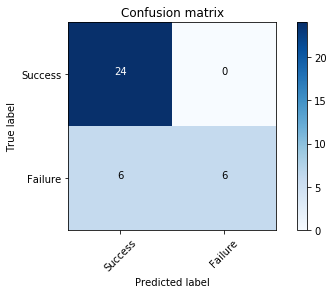

In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#confusion matrix for knn
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Now I understand that we only have a total of 36 predictions, but since I was only analyzing violent gun-related crimes from 2017 and split the crime count to either "high crime" or not, this will have to do. Here is what the confusion matrix is describing:

- a total of 36 predictions were made
- out of 36 predictions, the model predicted "Yes" 30 times and "No" 6 times
- the correct count is 24 "Yes" and "12" no

Calcualted rates:
- Accuracy: (24+6)/36 = 0.83
- Missclassification (Error Rate): (6+0)/36 = 0.16
- True positive rate (Sensetivity): 24/30 = 0.80
- False positive rate: 0/6 = 0
- True negative rate: 6/12 = 0.50
- Precision: 24/30 = 0.80

## Feature importance

[0.09633237 0.13005895 0.13089951 0.10759032 0.19712701 0.09475022
 0.15120362 0.09203801]


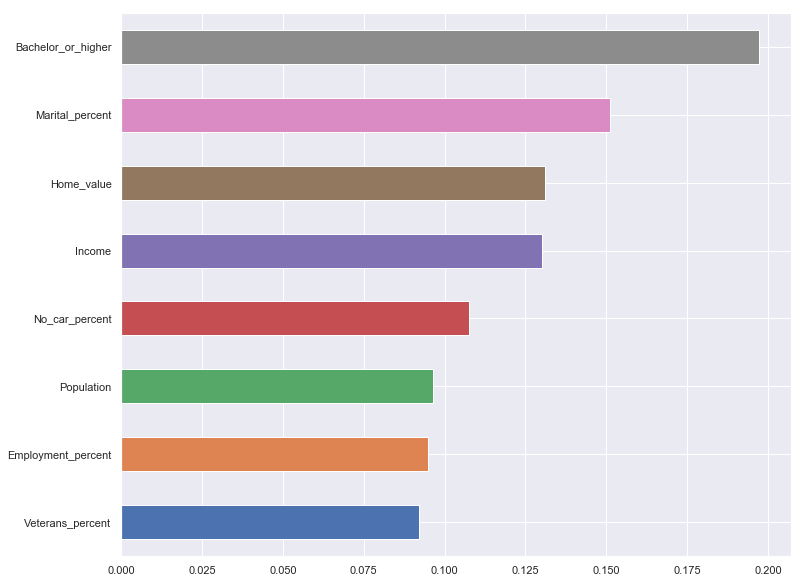

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(features, target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.show()

From the graph, we see that the three most important features are education, marital status, and income.

Just a few things to note about how to to build the map:
- convert the shapefile to geopandas
- save it as a json file
- create a variable which holds the json info `json(open('filename.json'))`
- used an online json viewer to understand the structor 
- noticed that `feature.id` was 0, 1, 2...
- need to change it to the `geoid` value
- ran a for loop to replace the `feature.id` to `properties.id`
- changed the column in my csv data file from int to str. in my json file, the `feature.id` was a str. in my csv file, the geoid column was int. both of these columns need to match in order for `key_on` to work
- note, i could have just changed the data type of the csv 17value column to str and then keyed it to `properties.GEOID` which would have worked as well

Links to research:

- [US Census](https://www.census.gov/)
- https://election.princeton.edu/wp-content/uploads/2013/01/violence_lead_Nevin.pdf 
- https://www.nij.gov/topics/crime/violent/pages/welcome.aspx 
- https://journalistsresource.org/studies/economics/real-estate/the-impact-of-crime-on-property-values-research-roundup/
- https://www.washingtonpost.com/realestate/beyond-wants-and-needs-flexibility-is-key-for-first-time-home-buyers/2018/01/29/8a496516-d5ec-11e7-b62d-d9345ced896d_story.html?utm_term=.3c7845e14e5c
- https://www.researchgate.net/publication/320173377_IMPACT_OF_CRIME_ON_PROPERTY_VALUES_LITERATURE_SURVEY_AND_RESEARCH_GAP_IDENTIFICATION


In [1]:
!jupyter nbconvert --to markdown Choropleth_map.ipynb
!mv Choropleth_map.md README.md

[NbConvertApp] Converting notebook Choropleth_map.ipynb to markdown
[NbConvertApp] Support files will be in Choropleth_map_files\
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Making directory Choropleth_map_files
[NbConvertApp] Writing 57884 bytes to Choropleth_map.md
